In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [89]:
data_file = pd.read_excel('./data.xlsx', engine='openpyxl', index_col='client_id')
data_file.head()

,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
client_id,,,,,,,
NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [90]:
data_file = data_file.replace('-', )

In [198]:
start_july = datetime(2021, 7, 1)
end_july = datetime(2021, 7, 31)
pd.to_datetime(data_file['receiving_date'], format='%b %d, %Y')
data_file_sum_in_july = data_file[data_file['receiving_date'] >= start_july]
data_file_sum_in_july = data_file_sum_in_july[data_file_sum_in_july['receiving_date'] <= end_july]
data_file_sum_in_july = data_file_sum_in_july[data_file_sum_in_july['status'] != 'ПРОСРОЧЕНО']
july_sum = data_file_sum_in_july['sum'].sum()
print("Общая выручка за июль 2021 года по непросроченным сделкам:", july_sum.round(2))

Общая выручка за июль 2021 года по непросроченным сделкам: 757830.74


In [297]:
group_sum_data = data_file.groupby(['receiving_date'])['sum'].agg('sum')

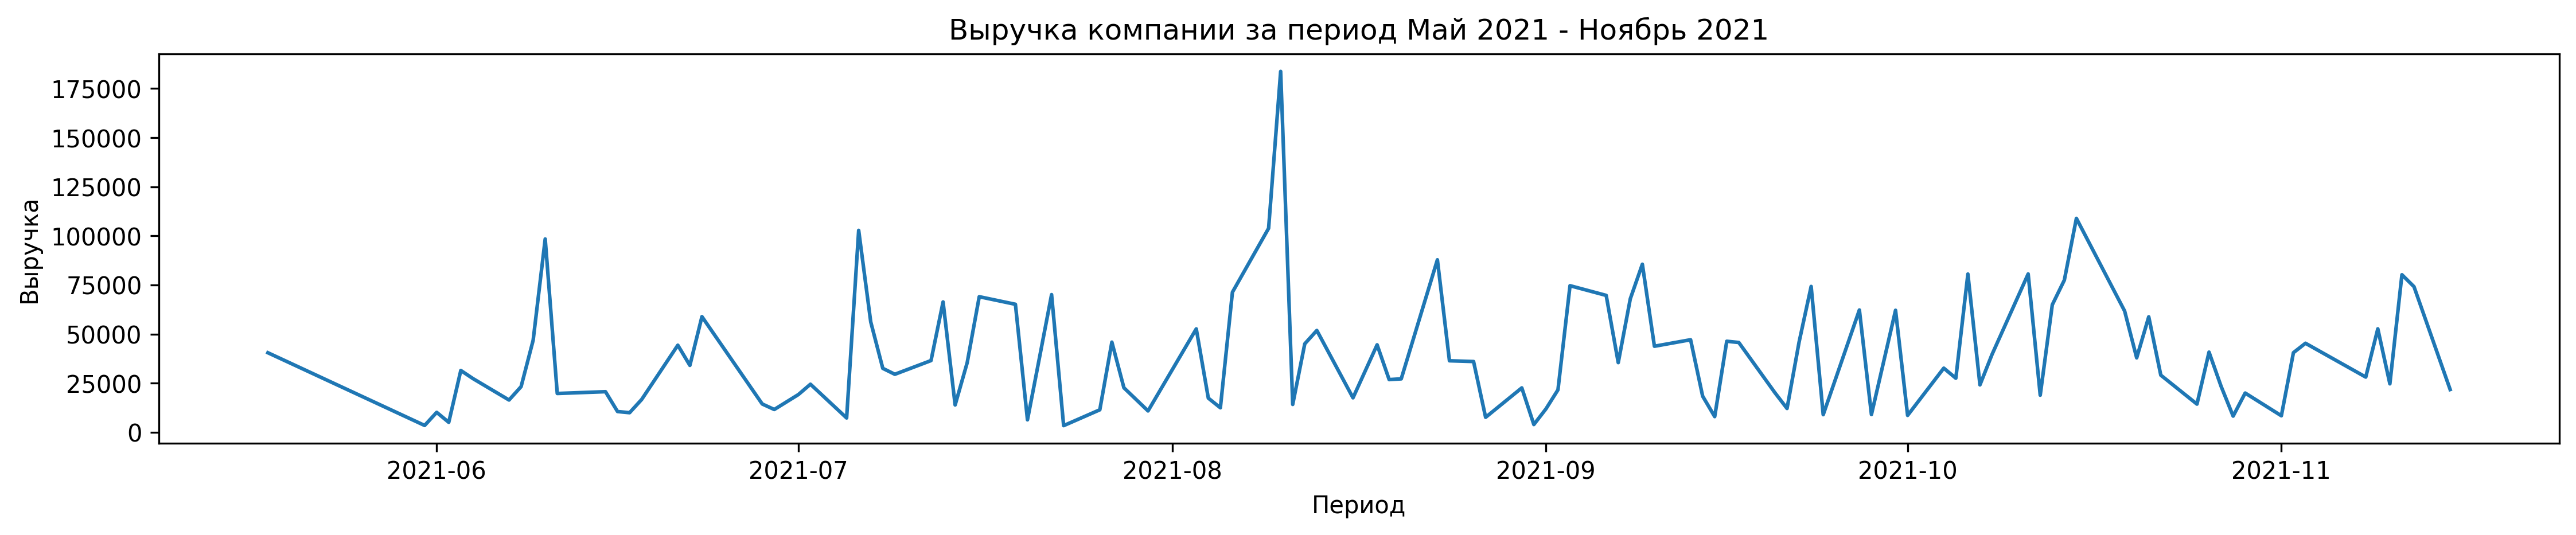

In [298]:
plt.figure(figsize=(18,3), dpi=300)
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.title('Выручка компании за период Май 2021 - Ноябрь 2021')
plt.plot(group_sum_data)
plt.show();

In [318]:
best_sellers = data_file.groupby(['sale'])['sum'].sum()
best_sellers.sort_values(ascending=False)[:1]

sale
Петрова    1118852.42
Name: sum, dtype: float64

In [319]:
print("Вывод: менеджер, привлекший больше всего денежных средств за указанный период: Петрова")

Вывод: менеджер, привлекший больше всего денежных средств за указанный период: Петрова


In [330]:
start_october = datetime(2021, 10, 1)
end_october = datetime(2021, 10, 31)
data_file_sum_in_october = data_file[data_file['receiving_date'] >= start_october]
data_file_sum_in_october = data_file_sum_in_october[data_file_sum_in_october['receiving_date'] <= end_october]
data_file_sum_in_october.groupby('new/current')['sum'].count()

new/current
новая       17
текущая    105
Name: sum, dtype: int64

In [326]:
print('Вывод: в октябре преобладающими были текущие сделки (105), а не новые (17)')

Вывод: в октябре преобладающими были текущие сделки (105), а не новые (17)


In [357]:
start_may = datetime(2021, 5, 1)
end_may = datetime(2021, 5, 31)
data_file_sum_in_may = data_file[data_file['receiving_date'] >= start_may]
data_file_sum_in_may = data_file_sum_in_may[data_file_sum_in_may['receiving_date'] <= end_may]
data_file_sum_in_may = data_file_sum_in_may[data_file_sum_in_may['document'] == 'оригинал']
print("Количество оригиналов договоров по сделкам в мае:", len(data_file_sum_in_may))

Количество оригиналов договоров по сделкам в мае: 4


## Задание

In [436]:
sellers = data_file['sale'].unique()
sellers_data = pd.DataFrame(sellers, columns = ['sale'])
sellers_data = sellers_data.dropna()
sellers_data.insert(1, 'bonus', 0)
sellers_data

,sale,bonus
1,Петрова,0
2,Иванов,0
3,Кузнецова,0
4,Андреев,0
5,Филимонова,0
6,Селиванов,0
7,Смирнов,0
8,Васильев,0
9,Соколов,0
10,Михайлов,0


In [485]:
sellers_new = data_file[data_file['new/current'] == 'новая']
sellers_new.insert(7, 'bonus', 0)
sellers_cur = data_file[data_file['new/current'] == 'текущая']
sellers_cur.insert(7, 'bonus', 0)
# оставить только месяцы до июля
first_of_july = datetime(2021, 7, 1)
sellers_new = sellers_new[sellers_new['receiving_date'] < first_of_july]
sellers_cur = sellers_cur[sellers_cur['receiving_date'] < first_of_july]

In [498]:
for index, row in sellers_new.iterrows():
    if(row['status'] == 'ОПЛАЧЕНО' and row['document'] == 'оригинал'):
        sellers_new.at[index, 'bonus'] = float(row['sum'] * 0.07)

In [499]:
for index, row in sellers_cur.iterrows():
    if(row['status'] != 'ПРОСРОЧЕНО' and row['document'] == 'оригинал'):
        if(row['sum'] <= 10000.00):
            sellers_cur.at[index, 'bonus'] = float(row['sum'] * 0.03)
        else:
            sellers_cur.at[index, 'bonus'] = float(row['sum'] * 0.05)

In [500]:
sellers_new_bonuses = sellers_new.groupby('sale')['bonus'].sum()
sellers_new_bonuses

sale
Андреев      1144
Васильев       35
Кузнецова     424
Петрова       770
Смирнов         0
Name: bonus, dtype: int64

In [547]:
sellers_cur_bonuses = sellers_cur.groupby('sale')['bonus'].sum().astype(int)
sellers_cur_bonuses

sale
Андреев       2989
Васильев       303
Иванов        2503
Кузнецова     2083
Петрова       5661
Селиванов      353
Смирнов       4078
Филимонова     409
Name: bonus, dtype: int32

In [593]:
# sellers_new_bonuses = sellers_new_bonuses.to_frame()
sellers_new_bonuses

,bonus
sale,
Андреев,1144
Васильев,35
Кузнецова,424
Петрова,770
Смирнов,0


In [594]:
# sellers_cur_bonuses = sellers_cur_bonuses.to_frame()
sellers_cur_bonuses

,bonus
sale,
Андреев,2989
Васильев,303
Иванов,2503
Кузнецова,2083
Петрова,5661
Селиванов,353
Смирнов,4078
Филимонова,409


In [604]:
res = sellers_new_bonuses.append(sellers_cur_bonuses)
res = res.append(sellers_new_bonuses)
result = res.groupby('sale')['bonus'].sum().to_frame()

In [605]:
result

,bonus
sale,
Андреев,5277
Васильев,373
Иванов,2503
Кузнецова,2931
Петрова,7201
Селиванов,353
Смирнов,4078
Филимонова,409
